<a href="https://colab.research.google.com/github/ikale1234/CSE151NEWS/blob/Milestone2/CSE151_Milestone_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Clone Directory

In [3]:
!git clone https://github.com/ikale1234/CSE151NEWS.git

Cloning into 'CSE151NEWS'...
remote: Enumerating objects: 56, done.
remote: Counting objects: 100% (56/56), done.
remote: Compressing objects: 100% (50/50), done.
remote: Total 56 (delta 11), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (56/56), 7.66 MiB | 2.94 MiB/s, done.
Resolving deltas: 100% (11/11), done.


### Importing Libraries

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Importing Dataset

In [4]:
df = pd.read_csv('/content/CSE151NEWS/data/news_eval.csv', sep=';')
df

,Unnamed: 0,title,text,label
0,0,"Sanders back in U.S. Senate, blasts 'coloniali...",WASHINGTON (Reuters) - Democratic U.S. preside...,1
1,1,Kremlin: Syria peoples' congress being 'active...,MOSCOW (Reuters) - A proposal to convene a con...,1
2,2,Oregon Cop Convicted Of Shattering Biker’s Co...,"In a baffling fit of rage, an Oregon State Pol...",0
3,3,Twitter Erupts With Glee Over #CruzSexScandal...,The last thing any politician running for the ...,0
4,4,MUST WATCH VIDEO: Obama Tries To Trash Trump B...,This is too good to miss! Mr. Teleprompter did...,0
...,...,...,...,...
8112,8112,Sean Hannity Throws Hissy Fit After Real Repo...,"Just like Donald Trump, Sean Hannity has a thi...",0
8113,8113,FORMER ASST FBI DIRECTOR WARNS ANTI-TRUMP KABA...,Former Asst. FBI Director James Kallstrom spok...,0
8114,8114,John McCain: Trump’s Attacks On The Press Are...,Donald Trump has declared the media to be the...,0
8115,8115,Syria's Deir al-Zor air base working again: st...,BEIRUT (Reuters) - The Deir al-Zor military ai...,1


### Data Observation Steps

Feature Information:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8117 entries, 0 to 8116
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  8117 non-null   int64 
 1   title       8117 non-null   object
 2   text        8117 non-null   object
 3   label       8117 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 253.8+ KB


Counting Null Values:

In [ ]:
df.isnull().sum()

,0
Unnamed: 0,0
title,0
text,0
label,0


Analyzing Data Entry Size and Label Information:

In [ ]:
df.describe()

,Unnamed: 0,label
count,8117.000000,8117.000000
mean,4058.000000,0.531477
std,2343.320401,0.499039
min,0.000000,0.000000
25%,2029.000000,0.000000
50%,4058.000000,1.000000
75%,6087.000000,1.000000
max,8116.000000,1.000000


Word Count of Titles:

In [18]:
df['title words'] = df['title'].apply(lambda x: len(x.split(' ')))
display(df['title words']), display(df['title words'].describe())

,title words
0,10
1,7
2,15
3,9
4,15
...,...
8112,16
8113,13
8114,14
8115,10


,title words
count,8117.000000
mean,12.093754
std,3.896607
min,1.000000
25%,9.000000
50%,11.000000
75%,14.000000
max,45.000000


(None, None)

Word Count of Article Text:

In [19]:
df['text words'] = df['text'].apply(lambda x: len(x.split(' ')))
display(df['text words']), display(df['text words'].describe())

,text words
0,340
1,92
2,526
3,451
4,24
...,...
8112,595
8113,200
8114,335
8115,227


,text words
count,8117.000000
mean,407.745596
std,320.516715
min,1.000000
25%,207.000000
50%,368.000000
75%,517.000000
max,7304.000000


(None, None)

Graphical Representation of Distribution of Labels:

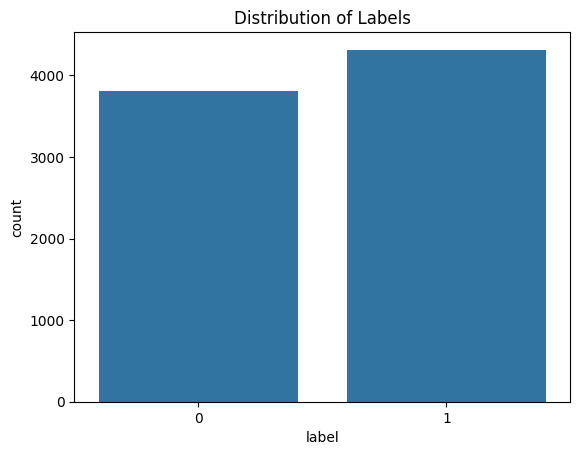

In [ ]:
sns.countplot(data=df, x='label')
plt.title('Distribution of Labels')
plt.show()

Graphical Representation of Title and Text Lengths:

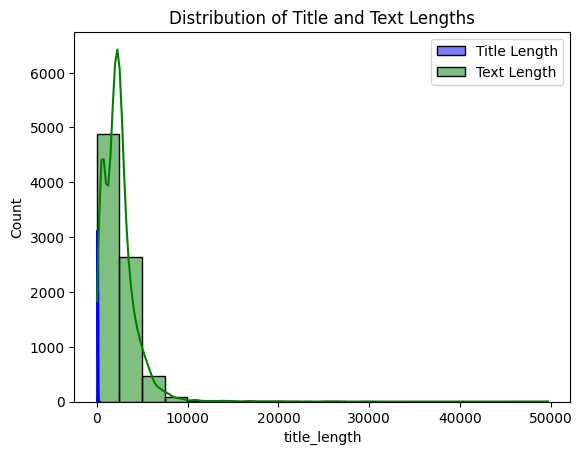

In [ ]:
df['title_length'] = df['title'].apply(len)
df['text_length'] = df['text'].apply(len)

sns.histplot(df['title_length'], bins=20, kde=True, color='blue', label='Title Length')
sns.histplot(df['text_length'], bins=20, kde=True, color='green', label='Text Length')
plt.legend()
plt.title('Distribution of Title and Text Lengths')
plt.show()

Running a Pairplot operation on our entire Dataset (Exluding Column Unnamed: 0):

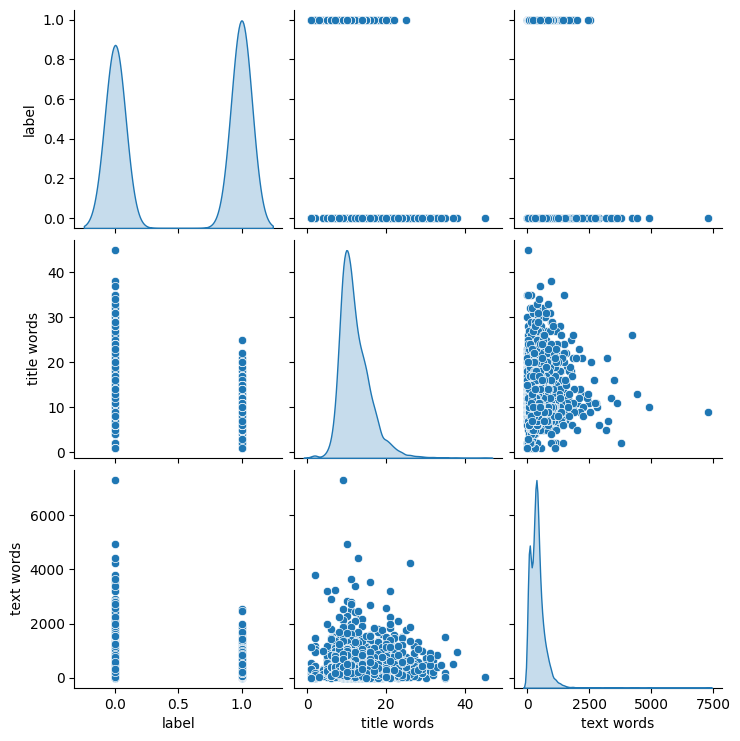

In [14]:
sns.pairplot(df.drop(['Unnamed: 0'], axis=1), diag_kind='kde')

Small Preprocessing Steps:

In [ ]:
# Text Preprocessing

import nltk
nltk.download('all')

text = list(df['title'])

# Preprocessing
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

corpus = []

for i in range(len(text)):
    r = re.sub('[^a-zA-Z]', ' ', text[i])
    r = r.lower()
    r = r.split()
    r = [word for word in r if word not in stopwords.words('english')]
    r = [lemmatizer.lemmatize(word) for word in r]
    r = ' '.join(r)
    corpus.append(r)

#assign corpus to data['text']
df['corpus_text'] = corpus
df.head()

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_r

,Unnamed: 0,title,text,label,title_length,text_length,words,corpus_text
0,0,"Sanders back in U.S. Senate, blasts 'coloniali...",WASHINGTON (Reuters) - Democratic U.S. preside...,1,64,2172,10,sander back u senate blast colonialism puerto ...
1,1,Kremlin: Syria peoples' congress being 'active...,MOSCOW (Reuters) - A proposal to convene a con...,1,59,525,7,kremlin syria people congress actively discussed
2,2,Oregon Cop Convicted Of Shattering Biker’s Co...,"In a baffling fit of rage, an Oregon State Pol...",0,94,2961,15,oregon cop convicted shattering biker collarbo...
3,3,Twitter Erupts With Glee Over #CruzSexScandal...,The last thing any politician running for the ...,0,62,2788,9,twitter erupts glee cruzsexscandal rumor tweet
4,4,MUST WATCH VIDEO: Obama Tries To Trash Trump B...,This is too good to miss! Mr. Teleprompter did...,0,83,118,15,must watch video obama try trash trump turn ba...


In [ ]:
X = df['corpus_text']
y = df['label']

# train test split (66% train - 33% test)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=123)

print('Training Data :', X_train.shape)
print('Testing Data : ', X_test.shape)

Training Data : (5438,)
Testing Data :  (2679,)


In [ ]:
# Feature Extraction
# Train Bag of Words model

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X_train_cv = cv.fit_transform(X_train)
X_train_cv.shape

(5438, 8241)

In [ ]:
# Training Logistic Regression model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train_cv, y_train)

# transform X_test using CV
X_test_cv = cv.transform(X_test)

# generate predictions
predictions = lr.predict(X_test_cv)
predictions

array([1, 0, 0, ..., 1, 1, 1])

In [ ]:
# Confusion Matrix
from sklearn import metrics
confusion_matrix = pd.DataFrame(metrics.confusion_matrix(y_test,predictions), index=['1','0'], columns=['1','0'])
confusion_matrix


,1,0
1,1073,204
0,85,1317
